# RSI strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [3]:
df = df[-1_000_000:]

In [5]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
        # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [18]:
df["rsi"] = rsi(df, 1000)

In [49]:
def get_high_rsi(df, x=52):
#     crit1 = df.rsi.shift(1) < x
    crit2 = df.rsi>x
    return df.close[crit2]

def get_low_rsi(df, x=48):
#     crit1 = df.rsi.shift(1) > x
    crit2 = df.rsi<x
    return df.close[crit2]

up = get_high_rsi(df)
down = get_low_rsi(df)

In [55]:
side_up = pd.Series(-1, index=up.index)
side_down = pd.Series(1, index=down.index)
side = pd.concat([side_up,side_down]).sort_index()
side

time
2021-04-23 07:39:07.316    1
2021-04-23 07:39:08.845    1
2021-04-23 07:39:10.885    1
2021-04-23 07:39:12.512    1
2021-04-23 07:39:16.085    1
                          ..
2021-06-19 15:01:47.591   -1
2021-06-19 15:01:50.079   -1
2021-06-19 15:01:50.526   -1
2021-06-19 15:01:51.128   -1
2021-06-19 15:01:51.294   -1
Length: 162271, dtype: int64

In [60]:
side.to_csv("../data/side.csv")

## Plotting

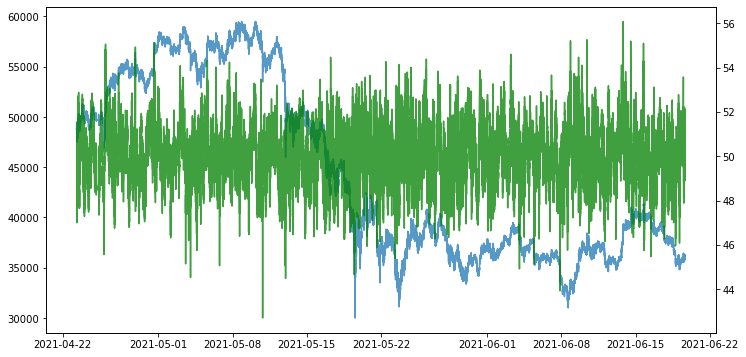

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.close, alpha=.75)
ax1 = ax.twinx()
ax1.plot(rsi(df, 1000), color="green", alpha=.75)

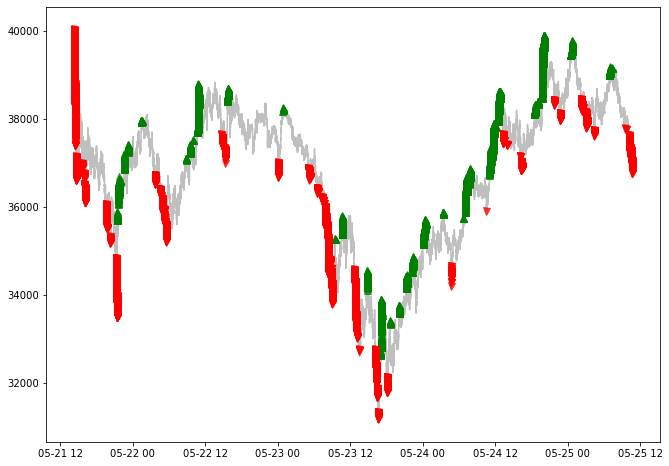

In [58]:
plot = df
plot["up"] = up
plot["down"] = down
plot = plot[-520_000:-400_000]

fig, ax = plt.subplots(figsize=(11,8))

# close_df.loc['2014':].plot(ax=ax, alpha=.5)
ax.plot(plot.close, alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g')

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r')


